In [4]:
%pylab inline
%matplotlib inline
import pandas as pd

store = pd.HDFStore('store.h5')
feats = store['feats']
labs = store['labs']

Populating the interactive namespace from numpy and matplotlib


# select subset of data

In [5]:
sel=(labs.F!=0)
labF = labs[sel].F
featsF = feats[sel]

In [6]:
sel2=(labs['T']!=0)
labT = labs[sel2].T
featsT = feats[sel2]

In [7]:
labV = labs.V
featsV = feats

# preprocessing the data

In [8]:
from sklearn import preprocessing
import numpy as np

sfeatsF = pd.DataFrame(preprocessing.scale(featsF))
sfeatsF.describe()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
count,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,...,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04,6.598100e+04
mean,-1.387576e-15,8.592225e-15,3.063634e-14,1.010850e-15,-6.561019e-15,-1.834810e-15,1.579212e-14,-1.898749e-15,4.959254e-15,7.736020e-16,...,-5.100662e-14,-1.088356e-13,-3.982288e-15,-8.137811e-14,-6.894407e-14,4.183541e-14,-9.388432e-14,5.573396e-14,-1.477149e-13,-5.091256e-14
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.749472e+00,-2.680238e+00,-8.900352e+00,-5.129760e+00,-2.969182e+00,-4.610411e+00,-3.504032e+00,-2.520199e+00,-1.868281e+00,-2.515418e+00,...,-6.367119e-01,-3.873525e-01,-5.182901e-01,-3.243084e-01,-4.157719e-01,-4.108988e-01,-3.434361e-01,-4.144036e-01,-2.418851e-01,-3.333061e-01
25%,-5.632710e-01,-4.002058e-01,-7.193572e-01,-6.272919e-01,-7.029226e-01,-7.266531e-01,-7.463593e-01,-8.138875e-01,-6.440530e-01,-5.787095e-01,...,-6.367119e-01,-3.873525e-01,-5.182901e-01,-3.243084e-01,-4.157719e-01,-4.108988e-01,-3.434361e-01,-4.144036e-01,-2.418851e-01,-3.333061e-01
50%,-1.876791e-02,1.422922e-01,1.505320e-01,4.849705e-02,4.360684e-02,1.231636e-02,5.370683e-02,1.204881e-01,-3.433656e-01,-7.066215e-02,...,-6.367119e-01,-2.829047e-01,-1.674469e-01,-3.243084e-01,-4.157719e-01,-4.108988e-01,-3.434361e-01,-4.144036e-01,-2.418851e-01,-3.333061e-01
75%,6.356161e-01,6.781881e-01,7.771972e-01,6.417231e-01,7.042240e-01,6.859605e-01,6.804507e-01,7.511406e-01,2.708958e-01,6.394651e-01,...,9.064607e-01,-1.784570e-01,4.556502e-02,-3.243084e-01,-4.157719e-01,-4.108988e-01,-3.434361e-01,-4.144036e-01,-2.418851e-01,-3.333061e-01
max,4.303618e+00,1.747780e+00,3.057802e+00,2.732011e+00,3.036649e+00,3.039352e+00,3.614928e+00,2.022685e+00,3.737392e+00,3.385087e+00,...,1.788274e+00,3.790557e+00,4.243153e+00,5.868133e+00,2.562441e+00,2.903218e+00,4.313164e+00,2.734959e+00,4.848671e+00,4.466358e+00


# split train and validation set

In [9]:
from sklearn.cross_validation import train_test_split
X_F_train, X_F_test, Y_F_train, Y_F_test = train_test_split(sfeatsF, labF, test_size=0.33, random_state=42)
print X_F_train.shape, X_F_test.shape, Y_F_train.shape, Y_F_test.shape

(44207, 81) (21774, 81) (44207,) (21774,)


# use linear model

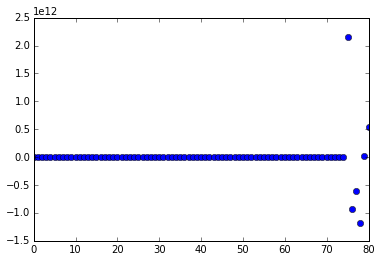

In [10]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_F_train,Y_F_train)
plot(lr.coef_,'o')

In [11]:
lr.score(X_F_test,Y_F_test)

0.99999971044002023

In [12]:
Y_pred = lr.predict(X_F_test)
sme = sum((Y_pred-Y_F_test)**2)/len(Y_pred)
rsme = sqrt(sme)
print rsme

1.81636920576


In [13]:
mean(Y_F_test)

15918.525046844965

In [14]:
highly_correlated = (abs(lr.coef_)>1e6)
print '%d features are highly correlated'%sum(highly_correlated)
featsF.columns[highly_correlated]

7 features are highly correlated


Index([u'PZDR', u'Y4', u'FI4', u'EM4', u'P4', u'SITA4', u'K4'], dtype='object')

# use linear model with lasso

In [15]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(sfeatsF,labF)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lowly_correlated= (lasso.coef_==0)
sum(lowly_correlated)

77

In [17]:
featsF.columns[~lowly_correlated]

Index([u'FPA', u'FPB', u'FPC', u'FPD'], dtype='object')

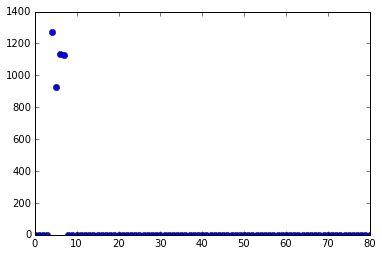

In [18]:
plot(lasso.coef_,'o')

In [19]:
lasso.score(X_F_test,Y_F_test)

0.99999970894081691

# correlation measure

In [20]:
featsetA=['PZDR','Y4','FI4','EM4','P4','SITA4','K4']
featsetB=['FPA','FPB','FPC','FPD']

by pca measure

In [21]:
import numpy as np
from sklearn.decomposition import PCA
sel_feats = featsF[featsetA+featsetB]
sel_feats.head()

,PZDR,Y4,FI4,EM4,P4,SITA4,K4,FPA,FPB,FPC,FPD
0,0,0,0,0,0,0,0,71.62905,127.0255,67.39005,53.60243
1,0,0,0,0,0,0,0,72.13542,126.6927,68.01215,52.67651
2,0,0,0,0,0,0,0,74.75405,126.3744,68.96702,49.66724
3,0,0,0,0,0,0,0,72.98901,127.1412,67.67940,53.97858
4,0,0,0,0,0,0,0,72.26563,126.9965,68.17130,55.70023


In [22]:
pca = PCA(n_components=4)
pca.fit(sel_feats)
print(sum(pca.explained_variance_ratio_))

0.940419762843


# CCA

In [14]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np

store = pd.HDFStore('store.h5')
feats = store['feats']
labs = store['labs']

sel=(labs.F!=0)
labF = labs[sel].F
featsF = feats[sel]
featsetA=['PZDR','Y4','FI4','EM4','P4','SITA4','K4']
featsetB=['FPA','FPB','FPC','FPD']

Populating the interactive namespace from numpy and matplotlib


In [15]:
from sklearn import preprocessing
X=featsF[featsetA]
Y=featsF[featsetB]
X=preprocessing.scale(X)
Y=preprocessing.scale(Y)

print X.shape, Y.shape

(65981, 7) (65981, 4)


([array([ 65981.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.]),
  array([ 56240.,      0.,      0.,      0.,      0.,   9741.,      0.,
              0.,      0.,      0.]),
  array([ 56240.,      0.,      0.,      0.,   3673.,   3514.,   2554.,
              0.,      0.,      0.]),
  array([ 56240.,   2958.,    715.,      0.,   3514.,      0.,      0.,
              0.,   2554.,      0.]),
  array([ 56240.,      0.,      0.,      0.,   6068.,   3673.,      0.,
              0.,      0.,      0.]),
  array([ 62308.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,   2958.,    715.]),
  array([ 56240.,   3673.,      0.,   3514.,      0.,      0.,      0.,
              0.,      0.,   2554.])],
 array([-0.41577187,  0.11067242,  0.63711671,  1.163561  ,  1.69000529,
         2.21644958,  2.74289387,  3.26933816,  3.79578245,  4.32222674,
         4.84867103]),
 <a list of 7 Lists of Patches objects>)

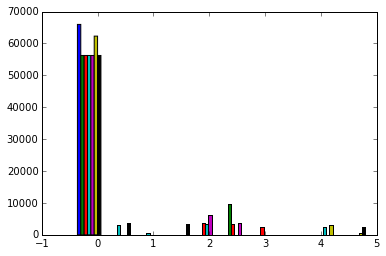

In [16]:
hist(X)

(array([   145.,    332.,   5160.,   5905.,   8002.,  14285.,  15777.,
         11814.,   2842.,   1719.]),
 array([  4556.646 ,   6520.7544,   8484.8628,  10448.9712,  12413.0796,
         14377.188 ,  16341.2964,  18305.4048,  20269.5132,  22233.6216,
         24197.73  ]),
 <a list of 10 Patch objects>)

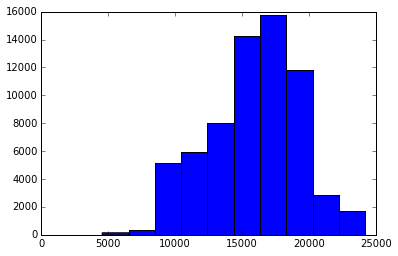

In [17]:
hist(labF)

([array([  0.00000000e+00,   3.00000000e+00,   1.86000000e+02,
           7.25400000e+03,   1.48260000e+04,   1.81310000e+04,
           1.63790000e+04,   7.92600000e+03,   1.13700000e+03,
           1.39000000e+02]),
  array([  6.50000000e+01,   4.15000000e+02,   8.22000000e+02,
           3.78900000e+03,   1.55210000e+04,   2.27680000e+04,
           1.25300000e+04,   8.90800000e+03,   1.14200000e+03,
           2.10000000e+01]),
  array([     0.,     77.,    819.,   5464.,  13824.,  21028.,  15245.,
           8537.,    444.,    543.]),
  array([     0.,      0.,    839.,   8887.,   9613.,  19548.,  18396.,
           8164.,    534.,      0.])],
 array([-4.61041094, -3.78787709, -2.96534323, -2.14280938, -1.32027553,
        -0.49774167,  0.32479218,  1.14732604,  1.96985989,  2.79239374,
         3.6149276 ]),
 <a list of 4 Lists of Patches objects>)

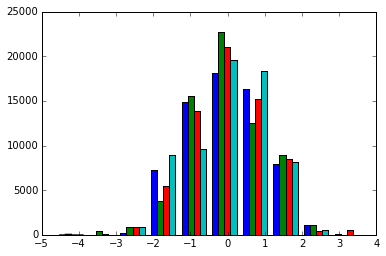

In [18]:
hist(Y)

# explore the feature find by linear regression

In [81]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np

store = pd.HDFStore('store.h5')
feats = store['feats']
labs = store['labs']

sel=(labs.F!=0)
labF = labs[sel].F
featsF = feats[sel]
featsetA=['PZDR','Y4','FI4','EM4','P4','SITA4','K4']
featsetB=['FPA','FPB','FPC','FPD']

Populating the interactive namespace from numpy and matplotlib


In [82]:
from sklearn import preprocessing
X=featsF[featsetA]
Y=featsF[featsetB]
idx = (X.EM4==0) & (X.FI4==0) & (X.K4==0) &(X.P4==0) & (X.PZDR==0)& (X.SITA4==0)& (X.Y4==0)
#idx = (X.EM4==0) | (X.FI4==0) | (X.K4==0) |(X.P4==0) | (X.PZDR==0)| (X.SITA4==0)| (X.Y4==0)
idx = ~idx
print sum(idx)
featsF2 = featsF[idx]
dX=featsF2[featsetA]
dY=featsF2[featsetB]

9741


(array([ 2958.,     0.,   715.,     0.,  1403.,     0.,  2111.,     0.,
            0.,  2554.]),
 array([ 20.5 ,  21.45,  22.4 ,  23.35,  24.3 ,  25.25,  26.2 ,  27.15,
         28.1 ,  29.05,  30.  ]),
 <a list of 10 Patch objects>)

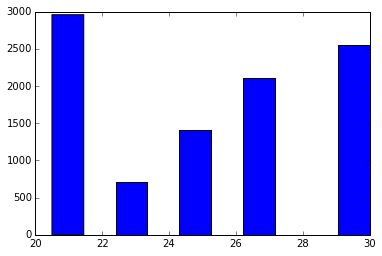

In [89]:
hist(dX.FI4.as_matrix())

In [64]:
X=preprocessing.scale(dX)
Y=preprocessing.scale(dY)
X=X[:,1:]
print X.shape, Y.shape

9741
(9741, 6) (9741, 4)


In [79]:
np.corrcoef(X[:,0],Y[:,0])[0,1]

-0.05747125031711852

In [80]:
res = np.zeros((6,3))
for i in range(6):
    for j in range(3):
        res[i,j]=np.corrcoef(X[:,i],Y[:,j])[0,1]
res

array([[-0.05747125, -0.03896955, -0.23807667],
       [-0.13429343, -0.12808604, -0.28535605],
       [-0.08928031,  0.05539435, -0.17337179],
       [-0.04782268,  0.18019212,  0.25133014],
       [-0.0106113 ,  0.23697088,  0.34420289],
       [-0.1543831 ,  0.05809124, -0.17834614]])

In [45]:
np.corrcoef(dX.iloc[:,1],dY.iloc[:,0])

array([[ 1.        , -0.05747125],
       [-0.05747125,  1.        ]])

In [46]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=1)
cca.fit(X,Y)

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [47]:
X_c, Y_c = cca.transform(X,Y)
print X_c.shape, Y_c.shape

(9741, 2) (9741, 2)


In [48]:
cca.x_weights_

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [18]:
>>> from sklearn.cross_decomposition import CCA
>>> X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [3.,5.,4.]]
>>> Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
>>> cca = CCA(n_components=1)
>>> cca.fit(X, Y)
... 
CCA(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)
>>> X_c, Y_c = cca.transform(X, Y)

In [20]:
cca.x_weights_

array([[ 0.75090645],
       [ 0.27037071],
       [ 0.60252733]])